<a href="https://colab.research.google.com/github/Farhanmian0011/Edtech/blob/main/Convolutional_Neural_Network_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load CIFAR-10 dataset (32x32 color images)
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


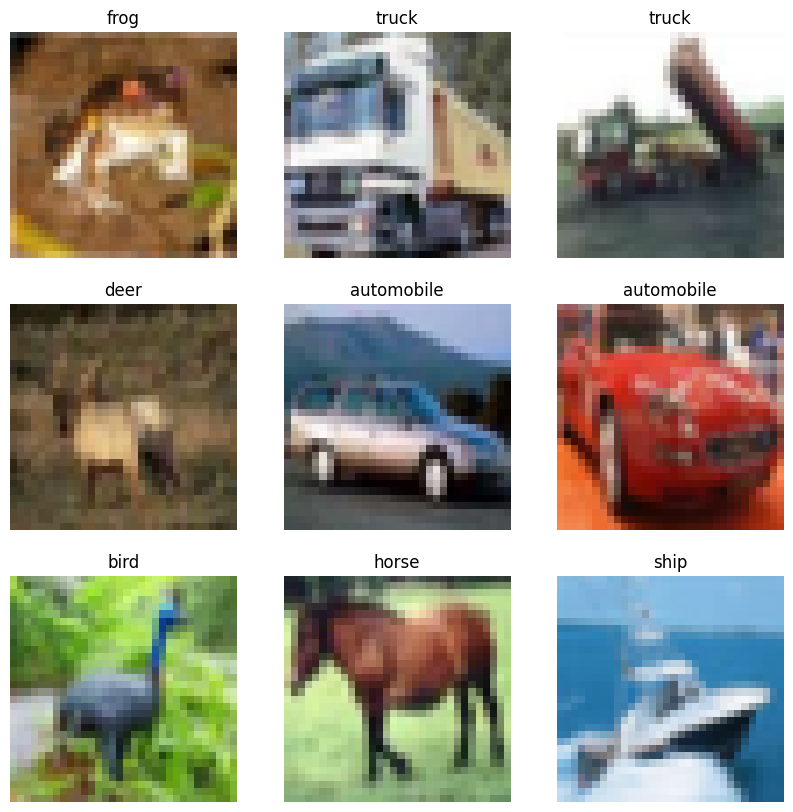

In [3]:
# Show first 9 images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()


In [4]:
# Normalize pixel values to 0-1 range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to categorical
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


In [5]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train for just 3 epochs (to save time for beginners)
history = model.fit(x_train[:1000], y_train[:1000],  # Use only 1000 samples for speed
                    epochs=3,
                    validation_data=(x_test[:200], y_test[:200]),
                    verbose=1)


Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.0944 - loss: 2.3084 - val_accuracy: 0.1300 - val_loss: 2.2503
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.2352 - loss: 2.1616 - val_accuracy: 0.2200 - val_loss: 2.0877
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.2713 - loss: 2.0016 - val_accuracy: 0.2350 - val_loss: 1.9691


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


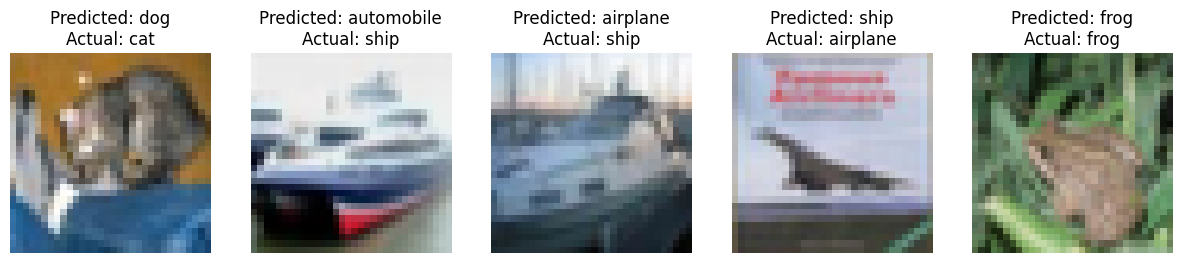

In [7]:
# Make predictions on test data
predictions = model.predict(x_test[:5])
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(y_test[:5], axis=1)

# Show results
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i])
    plt.title(f'Predicted: {class_names[predicted_classes[i]]}\nActual: {class_names[actual_classes[i]]}')
    plt.axis('off')
plt.show()


## Key Observations
- Built a Convolutional Neural Network (CNN) for image classification.
- Used CIFAR-10 dataset with 10 different classes (airplane, car, bird, etc.).
- The model has convolutional layers to detect features in images.
- Trained on a small subset of data for demonstration purposes.
- CNN can predict what object is in an image with reasonable accuracy.
- This is a basic example - real-world models need more data and training time.
- The model architecture includes Conv2D, MaxPooling, and Dense layers.